## Prediction-Based Word Vectors (GloVe)

In this notebook, we shall explore the word embeddings obtained from the GloVe (Global Vectors for Word Representations).
We will start by analyzing the relationships between some words of interest in the Reuter's corpus, by plotting 2 dimensional versions of the word vectors in a scatter plot (dimensionality reduction technique used is Truncated SVD), and observe the differences when compared to the results yielded from the previous count-based model.
Afterwards, we shall explore the quality of the word vectors by analyzing Polysemes, Synonyms, Antonyms, Analogies, and Bias.

In [1]:
from utils_PredictionBased import *
import pprint

In [2]:
wv_from_bin = load_embedding_model()

In [3]:
# Prepares a matrix of ~ 10k word vectors from the loaded GloVe model, and then reduces the dimension of each word embedding
# 400 to 2 using truncated SVD.
M, word2ind = get_matrix_of_vectors(wv_from_bin)
M_reduced = reduce_to_k_dim(M, k=2)

# Normalize each row of the matrix before plotting.
M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis] # broadcasting

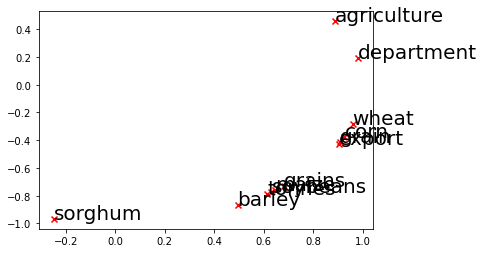

In [4]:
# Plot the 2 dimensional word embeddings.
words = ['tonnes', 'grain', 'wheat',  'agriculture', 'corn', 'maize', 'export', 'department', 'barley', 'grains', 'soybeans', 'sorghum']
plot_embeddings(M_reduced_normalized, word2ind, words)

### Exploring Polysemes - Words With Multiple Meanings

In [5]:
similars = wv_from_bin.most_similar('leaves')
print(similars)

[('ends', 0.6128067970275879), ('leaf', 0.6027014255523682), ('stems', 0.5998531579971313), ('takes', 0.5902854800224304), ('leaving', 0.5761634111404419), ('grows', 0.5663397312164307), ('flowers', 0.5600922107696533), ('turns', 0.5536050796508789), ('leave', 0.5496848821640015), ('goes', 0.5434924960136414)]


In [6]:
similars = wv_from_bin.most_similar('scoop')
print(similars)

[('scoops', 0.6437130570411682), ('spoon', 0.5459855794906616), ('scooped', 0.5319253206253052), ('slice', 0.5201053023338318), ('innside', 0.5154464244842529), ('cream', 0.4963828921318054), ('scooping', 0.49233871698379517), ('buckets', 0.4825914204120636), ('fatman', 0.4815135896205902), ('scrape', 0.4774448275566101)]


In [7]:
similars = wv_from_bin.most_similar('procure')
print(similars)

[('procuring', 0.6463401913642883), ('procured', 0.6035971641540527), ('obtain', 0.559282124042511), ('equip', 0.5188530683517456), ('manufacture', 0.5124150514602661), ('fabricate', 0.4991585910320282), ('assemble', 0.49078983068466187), ('smuggle', 0.48390427231788635), ('distribute', 0.4838152527809143), ('supplying', 0.4820416569709778)]


### Exploring Synonyms and Antonyms

In [8]:
# Normal Result.
print(wv_from_bin.distance('big', 'huge'))
print(wv_from_bin.distance('big', 'small'))

0.25513195991516113
0.3511464595794678


In [9]:
# Normal Result
print(wv_from_bin.distance('smart', 'intelligent'))
print(wv_from_bin.distance('smart', 'stupid'))

0.31352531909942627
0.5179578959941864


In [10]:
# Counter-Intuitive.
print(wv_from_bin.distance('happy', 'cheerful'))
print(wv_from_bin.distance('happy', 'sad'))

0.5172466933727264
0.40401363372802734


In [11]:
# Counter-Intuitive.
print(wv_from_bin.distance('fast', 'quick'))
print(wv_from_bin.distance('fast', 'slow'))

0.3328642249107361
0.25226807594299316


A word might potentially have a "stronger" relationship with its antonym compared to its synonym

### Exploring Analogies

In [12]:
# man is to grandfather as woman is to:
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'grandfather'], negative=['man']))
# Correct analogy.

[('grandmother', 0.7608445286750793),
 ('granddaughter', 0.7200808525085449),
 ('daughter', 0.7168302536010742),
 ('mother', 0.7151536345481873),
 ('niece', 0.7005682587623596),
 ('father', 0.6659888029098511),
 ('aunt', 0.6623408794403076),
 ('grandson', 0.6618767380714417),
 ('grandparents', 0.6446609497070312),
 ('wife', 0.6445354223251343)]


In [13]:
# fast is to fastest as quick is to:
pprint.pprint(wv_from_bin.most_similar(positive = ['quick','fastest'], negative = ['fast']))
# Correct analogy.

[('quickest', 0.6256531476974487),
 ('second', 0.5536414384841919),
 ('qualifying', 0.5309496521949768),
 ('third', 0.5297176837921143),
 ('fourth', 0.5130043625831604),
 ('first', 0.49420875310897827),
 ('clocking', 0.48427003622055054),
 ('sixth', 0.4821320176124573),
 ('fifth', 0.4795231521129608),
 ('seconds', 0.47230491042137146)]


In [14]:
# cat is to tiger as dog is to:
pprint.pprint(wv_from_bin.most_similar(positive = ['dog', 'tiger'], negative = ['cat']))
# Incorrect analogy.

[('woods', 0.4931395649909973),
 ('tigers', 0.4840834140777588),
 ('bear', 0.43776988983154297),
 ('lion', 0.4275178909301758),
 ('hunting', 0.4224510192871094),
 ('mickelson', 0.41707539558410645),
 ('cub', 0.41608965396881104),
 ('hunter', 0.4141656160354614),
 ('fighting', 0.4121222198009491),
 ('soldier', 0.41102439165115356)]


### Exploring Bias

In [15]:
# boy is to toy as girl is to:
pprint.pprint(wv_from_bin.most_similar(positive=['girl', 'toy'], negative=['boy']))

[('toys', 0.7094953060150146),
 ('doll', 0.5932914614677429),
 ('dolls', 0.570662260055542),
 ('barbie', 0.5407706499099731),
 ('mattel', 0.532855212688446),
 ('accessories', 0.5206909775733948),
 ('hasbro', 0.49227219820022583),
 ('jewelry', 0.47385695576667786),
 ('lego', 0.46908140182495117),
 ('apparel', 0.4613623321056366)]


In [16]:
# girl is to toy as boy is to:
pprint.pprint(wv_from_bin.most_similar(positive=['boy', 'toy'], negative=['girl']))

[('toys', 0.7157087922096252),
 ('hasbro', 0.5164632797241211),
 ('robot', 0.4731711149215698),
 ('pet', 0.4670490026473999),
 ('manufacturer', 0.46681639552116394),
 ('mattel', 0.4582391679286957),
 ('lego', 0.45811763405799866),
 ('miniature', 0.4441472887992859),
 ('makers', 0.44298243522644043),
 ('manufactured', 0.44275349378585815)]


Some degree of gender bias is apparent from the previous example, which is something to watch out for.